In [1]:
!wget https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/retail_sales.csv

--2022-09-08 04:26:10--  https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/retail_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5279 (5.2K) [text/plain]
Saving to: ‘retail_sales.csv’

retail_sales.csv    100%[===================>]   5.16K  --.-KB/s    in 0s      

2022-09-08 04:26:10 (52.5 MB/s) - ‘retail_sales.csv’ saved [5279/5279]



In [2]:
!pip install -q catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [3]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('retail_sales.csv')

In [5]:
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [6]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)]
        _y = data[i + seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x), np.array(y)

In [7]:
train = df.y.values[:-4]

In [8]:
seq_length = 5

x, y = sliding_windows(train, seq_length)

In [9]:
x.shape, y.shape

((284, 5), (284,))

In [10]:
model = CatBoostRegressor()

In [11]:
model.fit(x, y)

Learning rate set to 0.033559
0:	learn: 81001.6059050	total: 48.5ms	remaining: 48.5s
1:	learn: 78924.7896780	total: 57.1ms	remaining: 28.5s
2:	learn: 76761.8569868	total: 66.5ms	remaining: 22.1s
3:	learn: 74781.0351622	total: 72ms	remaining: 17.9s
4:	learn: 72823.0431891	total: 75.5ms	remaining: 15s
5:	learn: 70989.4178289	total: 79.7ms	remaining: 13.2s
6:	learn: 69175.4284424	total: 82.6ms	remaining: 11.7s
7:	learn: 67421.1559885	total: 87.6ms	remaining: 10.9s
8:	learn: 65726.8958172	total: 110ms	remaining: 12.1s
9:	learn: 64046.7843152	total: 140ms	remaining: 13.8s
10:	learn: 62417.0689943	total: 142ms	remaining: 12.8s
11:	learn: 60937.7695905	total: 147ms	remaining: 12.1s
12:	learn: 59495.5031976	total: 151ms	remaining: 11.5s
13:	learn: 58021.5034020	total: 156ms	remaining: 11s
14:	learn: 56637.0120827	total: 161ms	remaining: 10.6s
15:	learn: 55298.9027897	total: 181ms	remaining: 11.1s
16:	learn: 54014.2754703	total: 184ms	remaining: 10.6s
17:	learn: 52807.1776451	total: 196ms	remai

In [12]:
res = []
data = train.tolist()

for i in range(0, 4):
  test = np.array(data[-seq_length:])
  predict = model.predict(np.expand_dims(test, axis=0))
  res.append(predict.item())
  data.append(predict.tolist()[0])

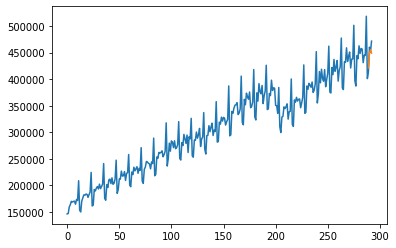

In [14]:
plt.plot(df.y.values)
plt.plot(np.arange(len(train), len(train) + 4), res)
plt.show()

In [15]:
before = np.empty(len(df[:-4]))
before[:] = np.nan
pred_result = np.concatenate((before, np.array(res)), axis=0)
result = pd.Series(pred_result, name="Predicted")
result = result.apply(lambda x: round(x, 2))

In [16]:
df['Predicted'] = result.to_list()
df['difference'] = round(df['y'] - df['Predicted'], 2)
df['error-percentage'] = (df['difference'] / df['y']) * 100
df['error-percentage'] = df['error-percentage'].apply(lambda x: round(x, 2))

In [17]:
df.tail(10)

,ds,y,Predicted,difference,error-percentage
283,2015-08-01,456340,NaN,NaN,NaN
284,2015-09-01,430917,NaN,NaN,NaN
285,2015-10-01,444959,NaN,NaN,NaN
286,2015-11-01,444507,NaN,NaN,NaN
287,2015-12-01,518253,NaN,NaN,NaN
288,2016-01-01,400928,NaN,NaN,NaN
289,2016-02-01,413554,421031.73,-7477.73,-1.81
290,2016-03-01,460093,448229.80,11863.20,2.58
291,2016-04-01,450935,455455.43,-4520.43,-1.00
292,2016-05-01,471421,448987.24,22433.76,4.76
